In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
sample = np.random.uniform(-1, 1, 10)  # our 'population' is an infinite set of numbers forming the uniform distribution in [-1,1)
test_statistic = np.mean(sample)
test_statistic

np.float64(0.08621189239645369)

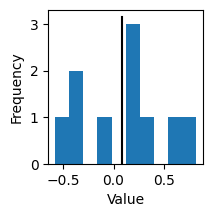

In [3]:
plt.figure(figsize=(2, 2))
plt.hist(sample)
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.plot([test_statistic, test_statistic], [plt.ylim()[0], plt.ylim()[1]], '-k')
plt.show()

In [4]:
numsamples = 10000  # number of surrogate data sets to be generated for sampling surrogate test statistics
surrogate_test_statistics = [np.mean(np.random.choice(sample, 10, replace=True)) for _ in range(numsamples)]

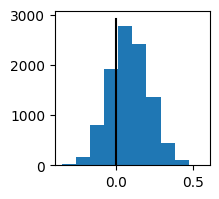

In [5]:
plt.figure(figsize=(2, 2))
plt.hist(surrogate_test_statistics)
plt.plot([0, 0], [plt.ylim()[0], plt.ylim()[1]], '-k')
plt.show()

## Hypothesis: the population mean is 0.0

In [6]:
alpha = 0.05

In [7]:
if test_statistic > 0.0:
    p_value = sum([1 for sts in surrogate_test_statistics if sts <= 0.0]) * 2 / numsamples
else:
    p_value = sum([1 for sts in surrogate_test_statistics if sts >= 0.0]) * 2 / numsamples
p_value

0.501

In [8]:
print('reject:', p_value < alpha)

reject: False


## Alternative method:

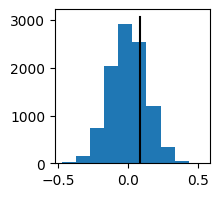

p-value = 0.5126
reject: False


In [9]:
sample2 = sample - np.mean(sample)  # make the hypothesis H0 true!
surrogate_test_statistics2 = [np.mean(np.random.choice(sample2, 10, replace=True)) for _ in range(numsamples)]
plt.figure(figsize=(2, 2))
plt.hist(surrogate_test_statistics2)
plt.plot([test_statistic, test_statistic], [plt.ylim()[0], plt.ylim()[1]], '-k')
plt.show()
if test_statistic > 0.0:
    p_value2 = sum([1 for sts in surrogate_test_statistics2 if sts >= test_statistic or sts <= -test_statistic]) / numsamples
else:
    p_value2 = sum([1 for sts in surrogate_test_statistics2 if sts <= test_statistic or sts >= -test_statistic]) / numsamples
print('p-value =', p_value2)
print('reject:', p_value2 < alpha)